## import libraries

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import seaborn as sns
from scipy.stats import norm
%matplotlib inline

## get asset data for past 6 months

In [2]:
no_days = 180
today = datetime.now()
begin = (today - timedelta(days=no_days)).strftime('%Y-%m-%d') 
stocks_list = ['HD', 'MSFT', 'NVDA', 'TSLA', 'UNH', 'SCHG']# stocks: home depot, microsoft, nvidia, tesla, unitedhealth group, schwab-growth 
commodities_list = ['CL=F', 'GC=F', 'HG=F', 'NG=F', 'ZC=F']# commodities: crude oil, gold, copper, natural gas, corn
stocks = yf.download(stocks_list, start=begin)['Adj Close']
comms = yf.download(commodities_list, start=begin)['Adj Close']

[*********************100%***********************]  6 of 6 completed
[*********************100%***********************]  5 of 5 completed


In [3]:
stocks

,HD,MSFT,NVDA,SCHG,TSLA,UNH
Date,,,,,,
2023-02-06,324.566101,255.569763,210.832367,62.361095,194.759995,471.617310
2023-02-07,320.554230,266.309357,221.669403,63.617889,196.809998,473.244843
2023-02-08,316.207245,265.483246,221.989319,62.720181,201.289993,479.536499
2023-02-09,311.042084,262.387756,223.308960,62.161606,207.320007,482.027374
2023-02-10,312.017975,261.870209,212.591873,61.762615,196.889999,490.482422
...,...,...,...,...,...,...
2023-07-28,331.369995,338.369995,467.500000,77.449997,266.440002,502.910004
2023-07-31,333.839996,335.920013,467.290009,77.599998,267.429993,506.369995
2023-08-01,332.070007,336.339996,465.070007,77.419998,261.070007,504.739990


In [4]:
comms

,CL=F,GC=F,HG=F,NG=F,ZC=F
Date,,,,,
2023-02-06,74.110001,1866.199951,4.0435,2.457,679.00
2023-02-07,77.139999,1871.699951,4.0885,2.584,674.00
2023-02-08,78.470001,1877.400024,4.0435,2.396,678.50
2023-02-09,78.059998,1866.199951,4.1055,2.430,670.75
2023-02-10,79.720001,1862.800049,4.0275,2.514,680.50
...,...,...,...,...,...
2023-07-28,80.580002,1960.400024,3.9170,2.638,521.00
2023-07-31,81.800003,1970.500000,3.9945,2.634,504.00
2023-08-01,81.370003,1940.699951,3.8935,2.560,497.00


## normalize then plot data

Text(0, 0.5, 'Normalized Stock Prices (%)')

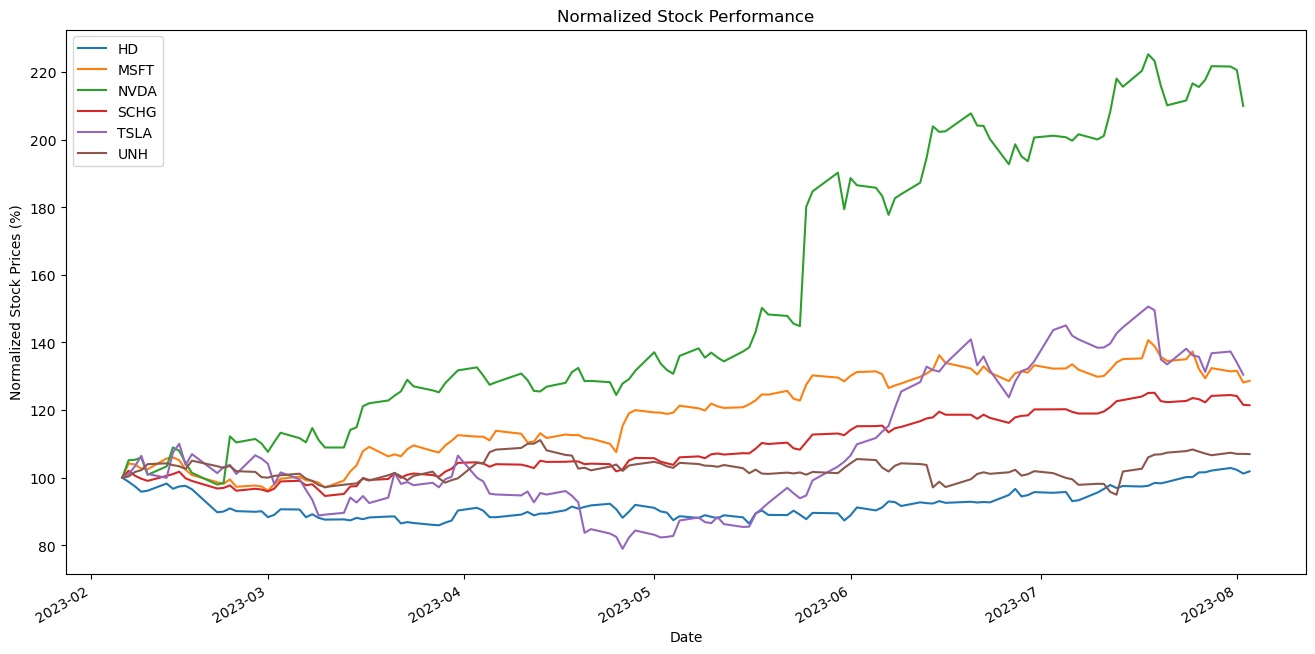

In [5]:
norm_stocks = ((stocks / stocks.iloc[0]) * 100)
norm_stocks.plot(figsize=(16,8))
plt.title('Normalized Stock Performance')
plt.ylabel('Normalized Stock Prices (%)')

Text(0, 0.5, 'Normalized Commodities Prices (%)')

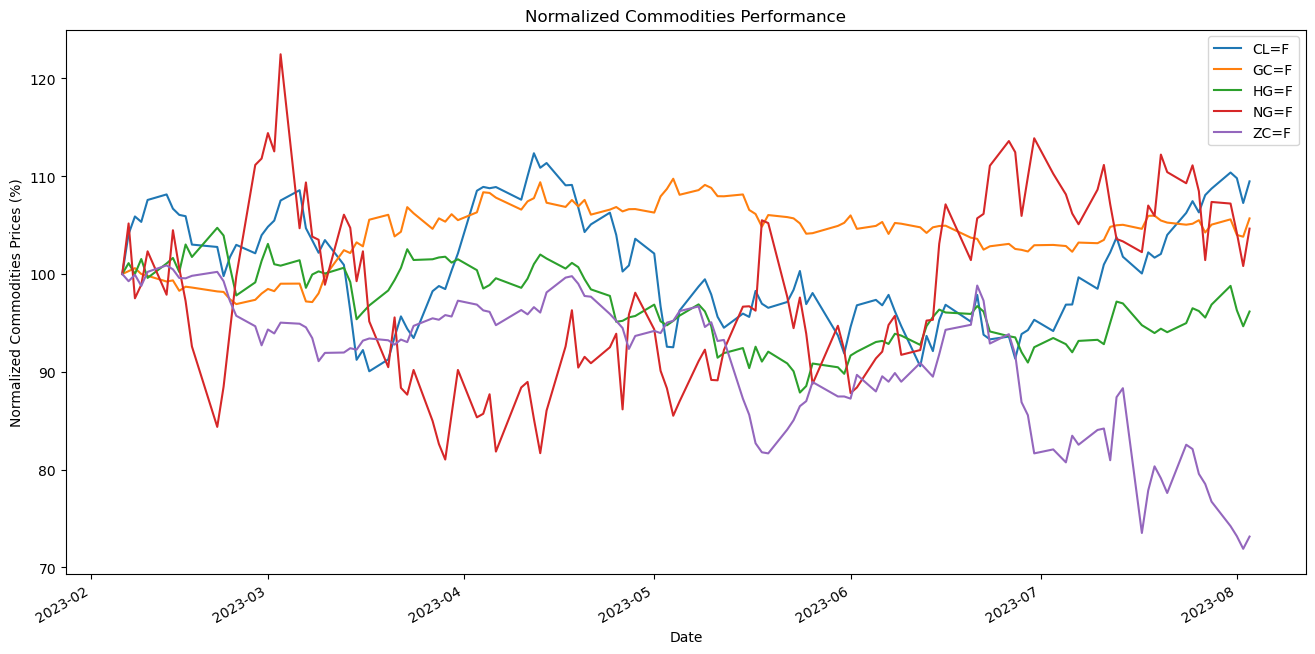

In [6]:
norm_comms = ((comms / comms.iloc[0]) * 100)
norm_comms.plot(figsize=(16,8))
plt.title('Normalized Commodities Performance')
plt.ylabel('Normalized Commodities Prices (%)')

## calculate annual returns and risk

In [7]:
stocks_daily_ret = stocks.pct_change().dropna()
stocks_daily_summary = stocks_daily_ret.describe().T.loc[:,['mean', 'std']]
stocks_annual_summary = stocks_daily_summary.copy()
stocks_annual_summary['mean'] = stocks_annual_summary['mean']*252
stocks_annual_summary['std'] = stocks_annual_summary['std']*np.sqrt(252)
stocks_annual_summary

,mean,std
HD,0.063468,0.226733
MSFT,0.552539,0.271403
NVDA,1.661508,0.544184
SCHG,0.412156,0.169990
TSLA,0.676572,0.512295
UNH,0.165529,0.236193


In [8]:
comms_daily_ret = comms.pct_change().dropna()
comms_daily_summary = comms_daily_ret.describe().T.loc[:,['mean', 'std']]
comms_annual_summary = comms_daily_summary.copy()
comms_annual_summary['mean'] = comms_annual_summary['mean']*252
comms_annual_summary['std'] = comms_annual_summary['std']*np.sqrt(252)
comms_annual_summary

,mean,std
CL=F,0.246510,0.350356
GC=F,0.123053,0.140274
HG=F,-0.054674,0.225936
NG=F,0.367887,0.743886
ZC=F,-0.554880,0.404969


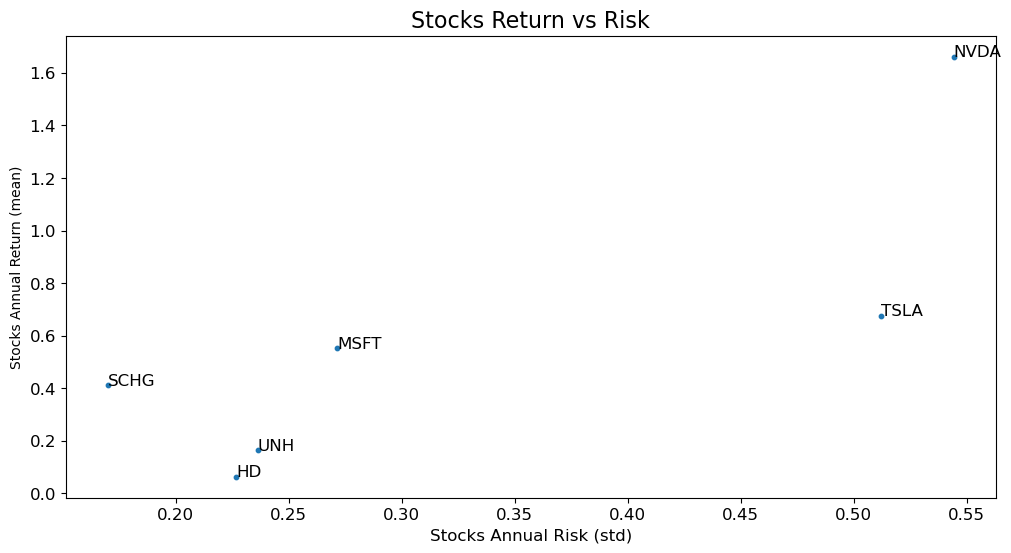

In [9]:
stocks_annual_summary.plot.scatter(x='std', y='mean', figsize=(12,6), s=10, fontsize=12)
for i in stocks_annual_summary.index:
    plt.annotate(i, xy=(stocks_annual_summary.loc[i, 'std'], stocks_annual_summary.loc[i, 'mean']), size=12)
plt.xlabel('Stocks Annual Risk (std)', fontsize=12)
plt.ylabel('Stocks Annual Return (mean)')
plt.title('Stocks Return vs Risk', fontsize=16)
plt.show()

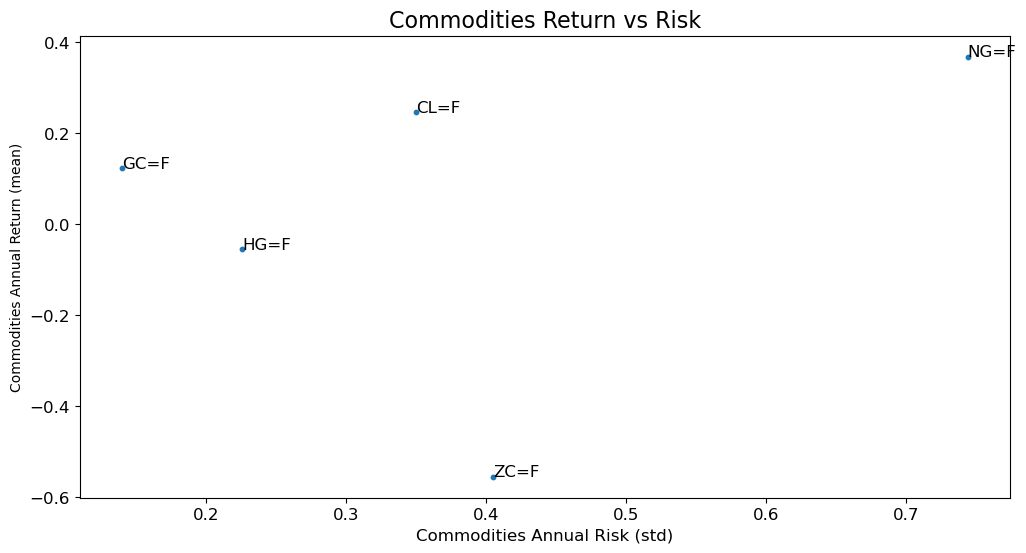

In [10]:
comms_annual_summary.plot.scatter(x='std', y='mean', figsize=(12,6), s=10, fontsize=12)
for i in comms_annual_summary.index:
    plt.annotate(i, xy=(comms_annual_summary.loc[i, 'std'], comms_annual_summary.loc[i, 'mean']), size=12)
plt.xlabel('Commodities Annual Risk (std)', fontsize=12)
plt.ylabel('Commodities Annual Return (mean)')
plt.title('Commodities Return vs Risk', fontsize=16)
plt.show()

## correlation and covariance

In [11]:
stocks_cov = stocks_daily_ret.cov()
stocks_corr = stocks_daily_ret.corr()

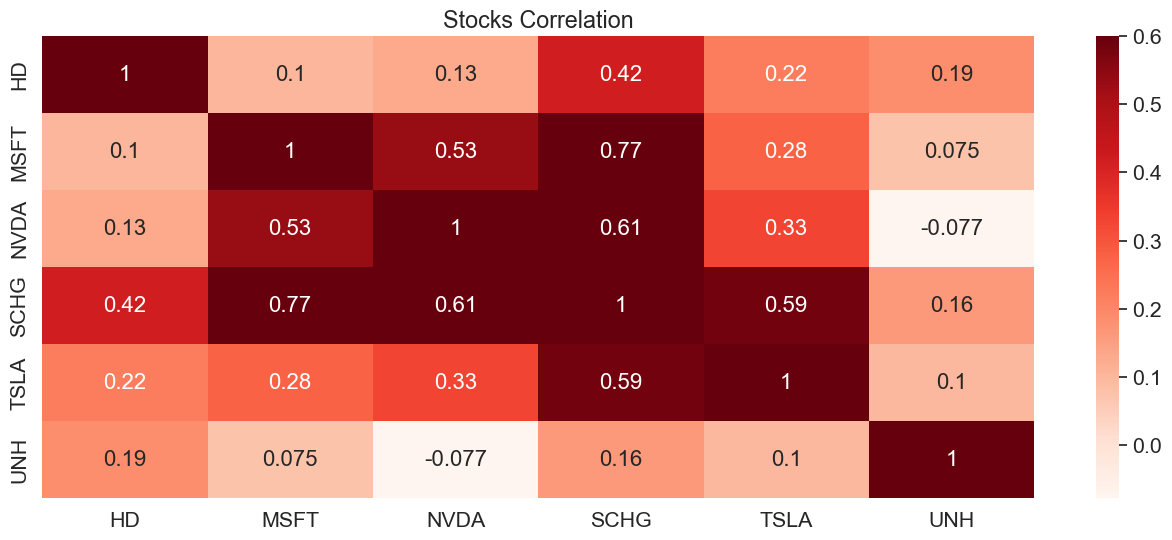

In [12]:
# plot heatmap of stocks correlation
plt.figure(figsize=(16,6))
sns.set(font_scale=1.4)
sns.heatmap(stocks_corr,cmap='Reds',annot=True,annot_kws={'size':16},vmax=0.6)
plt.title('Stocks Correlation')
plt.show()

In [13]:
comms_cov = comms_daily_ret.cov()
comms_corr = comms_daily_ret.corr()

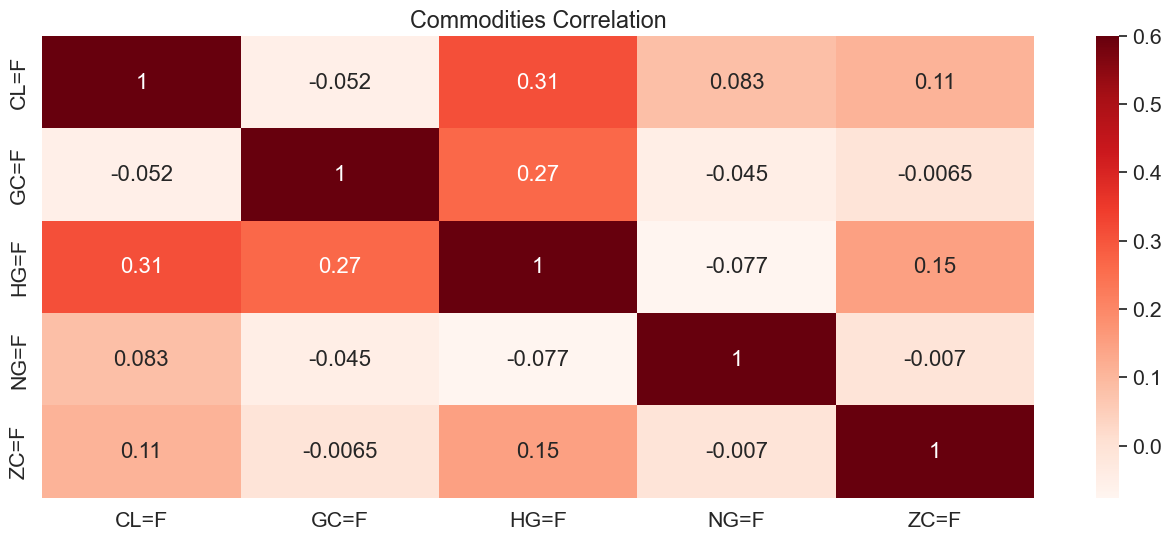

In [14]:
# plot heatmap of commodities correlation
plt.figure(figsize=(16,6))
sns.set(font_scale=1.4)
sns.heatmap(comms_corr,cmap='Reds',annot=True,annot_kws={'size':16},vmax=0.6)
plt.title('Commodities Correlation')
plt.show()

## forecast prices

In [15]:
# get data for natural gas
nat_gas = comms['NG=F']
nat_gas

Date
2023-02-06    2.457
2023-02-07    2.584
2023-02-08    2.396
2023-02-09    2.430
2023-02-10    2.514
              ...  
2023-07-28    2.638
2023-07-31    2.634
2023-08-01    2.560
2023-08-02    2.477
2023-08-03    2.571
Name: NG=F, Length: 124, dtype: float64

Text(0, 0.5, 'Price ($/mmBtu)')

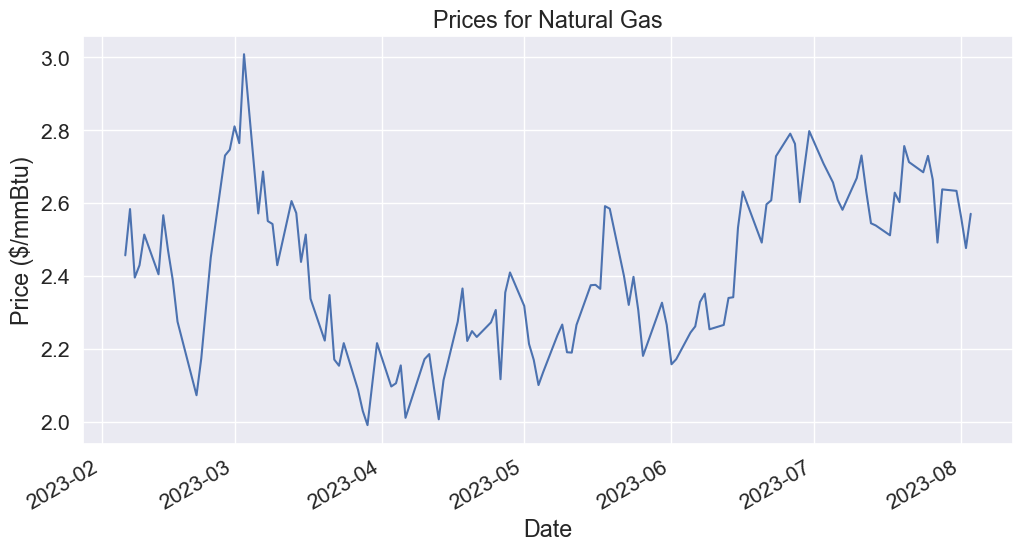

In [16]:
# get returns for natural gas
nat_gas_returns = np.log(1 + nat_gas.pct_change())
nat_gas.plot(figsize=(12,6))
plt.title('Prices for Natural Gas')
plt.ylabel('Price ($/mmBtu)')

Text(0, 0.5, 'Daily Returns ($)')

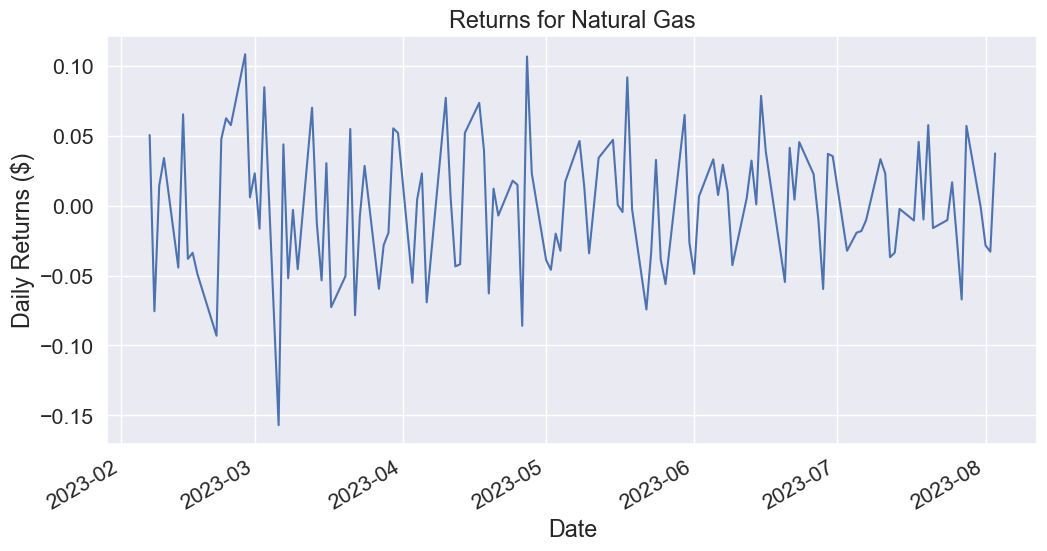

In [17]:
nat_gas_returns.plot(figsize=(12,6))
plt.title('Returns for Natural Gas')
plt.ylabel('Daily Returns ($)')

In [18]:
# get mean, variance, and standard deviation
u = nat_gas_returns.mean()
var = nat_gas_returns.var()
std = [nat_gas_returns.std()]

In [19]:
# calculate drift = u - 1/2(var)
drift = [u - (0.5 * var)]

In [20]:
# forecast nat_gas prices for every trading day for the next year 
# get 10 possible outcomes/iterations
days = 90
iterations = 10

In [21]:
# calculate daily returns = exp(drift + std * z)
# z = 𝑛𝑜𝑟𝑚.𝑝𝑝𝑓(𝑛𝑝.𝑟𝑎𝑛𝑑𝑜𝑚.𝑟𝑎𝑛𝑑(𝑡_𝑖𝑛𝑡𝑒𝑟𝑣𝑎𝑙𝑠,𝑖𝑡𝑒𝑟𝑎𝑡𝑖𝑜𝑛𝑠)
daily_returns = np.exp(drift + std * norm.ppf(np.random.rand(days, iterations)))

In [22]:
# get last closing price of nat_gas
last_close = nat_gas.iloc[-1]

In [23]:
# create matrix, price_list, with same dimensions as daily_returns
price_list = np.zeros_like(daily_returns)

In [24]:
price_list[0] = last_close

In [25]:
# loop to reassign to the price in time t the product of the price in day t-1
for day in range(1, days):
    price_list[day] = price_list[day - 1] * daily_returns[day]

Text(0.5, 0, 'Day')

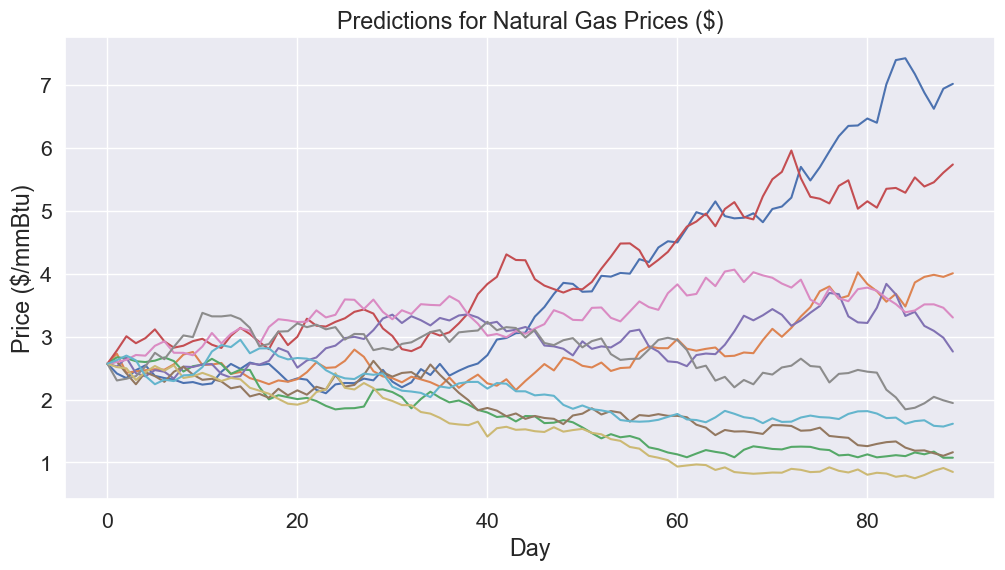

In [26]:
# plot obtained price list data
plt.figure(figsize=(12,6))
plt.plot(price_list)
plt.title('Predictions for Natural Gas Prices ($)')
plt.ylabel('Price ($/mmBtu)')
plt.xlabel('Day')